


# Classification Airline Passenger Satisfaction info

## Import libraries
_____________________________

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , cross_val_predict
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
np.set_printoptions(suppress=True)
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn import linear_model, neighbors, ensemble
sns.set_style("whitegrid")
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

## Load Data
____________

In [2]:
df = pd.read_csv('train.csv', index_col=[0]) #read the data 

df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.tail()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [4]:
df.sample (10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
47443,46142,Female,disloyal Customer,41,Business travel,Eco,604,1,4,1,...,2,5,5,5,2,4,2,0,0.0,neutral or dissatisfied
21643,124095,Male,Loyal Customer,38,Business travel,Eco,529,4,1,1,...,4,4,1,2,1,2,4,0,0.0,neutral or dissatisfied
32561,24793,Male,Loyal Customer,9,Personal Travel,Eco,447,3,4,3,...,5,3,5,5,4,5,5,27,33.0,neutral or dissatisfied
18108,102064,Male,Loyal Customer,69,Personal Travel,Business,397,1,4,1,...,2,2,1,2,1,2,3,48,32.0,neutral or dissatisfied
40054,19650,Female,Loyal Customer,28,Business travel,Business,1563,5,5,5,...,4,1,2,5,3,4,4,0,0.0,satisfied
28260,128554,Female,Loyal Customer,60,Business travel,Business,3117,1,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
14254,60063,Female,Loyal Customer,35,Business travel,Business,3268,2,2,2,...,2,2,2,2,3,2,5,0,0.0,satisfied
48587,92486,Female,Loyal Customer,55,Business travel,Eco,2092,1,3,4,...,2,2,1,2,1,2,3,36,10.0,neutral or dissatisfied
63943,25424,Female,Loyal Customer,51,Business travel,Business,2441,1,1,5,...,3,3,3,3,5,3,5,0,0.0,satisfied
57059,100821,Female,disloyal Customer,19,Business travel,Eco,711,2,2,2,...,2,4,3,4,4,4,2,0,0.0,neutral or dissatisfied


In [5]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [6]:
df.shape 

(103904, 24)

In [7]:
df.columns = [c.replace(' ', '_') for c in df.columns]

In [8]:
df.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')


## Check for target(Y)

In [9]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [10]:
df['satisfaction'].nunique()

2

In [11]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

# Split the Data
______________


Spilt the data into Train 80% and Test 20%
_____

In [12]:
seed=30

In [13]:
df_train, df_test = train_test_split(df ,test_size=0.2,random_state=seed )

 Train Data EDA

In [14]:
df_train

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
99599,48630,Female,Loyal Customer,45,Business travel,Business,1939,0,4,0,...,4,4,2,2,4,4,4,0,0.0,satisfied
13539,122468,Male,Loyal Customer,52,Business travel,Business,2205,4,4,4,...,4,4,4,4,3,4,1,14,8.0,neutral or dissatisfied
51615,63750,Male,Loyal Customer,44,Personal Travel,Eco,1660,2,2,2,...,2,4,5,4,1,3,2,0,0.0,neutral or dissatisfied
56520,1277,Male,Loyal Customer,52,Personal Travel,Eco,89,3,4,3,...,1,1,2,3,1,5,1,16,13.0,neutral or dissatisfied
7010,120091,Male,Loyal Customer,29,Business travel,Business,683,5,5,5,...,4,5,3,5,5,5,4,0,4.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46220,4885,Female,Loyal Customer,11,Personal Travel,Eco,500,0,5,0,...,5,5,2,4,3,5,5,0,0.0,satisfied
98804,98824,Male,disloyal Customer,25,Business travel,Eco,763,3,3,3,...,4,1,1,3,2,3,4,78,99.0,neutral or dissatisfied
48045,26791,Male,disloyal Customer,36,Business travel,Business,226,4,4,4,...,1,3,4,4,3,4,1,0,0.0,neutral or dissatisfied
70053,8890,Male,Loyal Customer,15,Personal Travel,Eco,539,1,5,1,...,2,4,5,4,4,4,2,21,14.0,neutral or dissatisfied


In [15]:
df_train.sample (10)

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
24511,476,Female,Loyal Customer,62,Business travel,Business,3490,3,3,3,...,4,4,4,5,5,4,3,22,19.0,satisfied
25953,92629,Female,Loyal Customer,51,Business travel,Eco,453,3,5,5,...,3,3,3,3,2,3,3,9,0.0,neutral or dissatisfied
53175,90064,Female,Loyal Customer,60,Business travel,Business,3866,4,4,4,...,5,5,5,5,4,5,3,0,0.0,satisfied
21255,5670,Male,disloyal Customer,22,Business travel,Eco,299,3,0,3,...,1,5,4,4,4,4,1,2,16.0,neutral or dissatisfied
5536,60266,Male,Loyal Customer,44,Personal Travel,Eco Plus,1607,3,4,3,...,3,3,3,4,5,4,3,38,33.0,neutral or dissatisfied
9545,100607,Male,Loyal Customer,55,Business travel,Business,1670,5,5,5,...,4,5,4,4,2,5,2,144,139.0,satisfied
26141,74211,Male,Loyal Customer,14,Personal Travel,Eco Plus,592,3,5,3,...,2,2,3,4,2,2,2,0,0.0,neutral or dissatisfied
9611,58797,Female,Loyal Customer,63,Business travel,Business,3991,2,2,2,...,2,2,2,2,2,2,2,41,33.0,neutral or dissatisfied
26154,11394,Male,Loyal Customer,42,Business travel,Business,458,3,3,3,...,5,5,5,5,3,5,3,1,8.0,satisfied
79205,49260,Male,disloyal Customer,50,Business travel,Eco,109,2,3,2,...,1,3,3,4,3,3,1,14,24.0,neutral or dissatisfied


In [16]:
df_train.shape 

(83123, 24)

## Check for missing values and data types
_______

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83123 entries, 99599 to 38693
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 83123 non-null  int64  
 1   Gender                             83123 non-null  object 
 2   Customer_Type                      83123 non-null  object 
 3   Age                                83123 non-null  int64  
 4   Type_of_Travel                     83123 non-null  object 
 5   Class                              83123 non-null  object 
 6   Flight_Distance                    83123 non-null  int64  
 7   Inflight_wifi_service              83123 non-null  int64  
 8   Departure/Arrival_time_convenient  83123 non-null  int64  
 9   Ease_of_Online_booking             83123 non-null  int64  
 10  Gate_location                      83123 non-null  int64  
 11  Food_and_drink                     83123 non-null 

In [18]:
df_train.isnull().sum()

id                                     0
Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             245
satisfaction                           0
dtype: int64

fill with median or mean depend on data distripution

In [19]:
df_train['Arrival_Delay_in_Minutes'].median()

0.0

In [20]:
df_train['Arrival_Delay_in_Minutes'].describe()


count    82878.000000
mean        15.188108
std         38.940049
min          0.000000
25%          0.000000
50%          0.000000
75%         13.000000
max       1584.000000
Name: Arrival_Delay_in_Minutes, dtype: float64

In [21]:
df_train['Arrival_Delay_in_Minutes'] = df_train['Arrival_Delay_in_Minutes'].fillna(df_train['Arrival_Delay_in_Minutes'].median())

In [22]:
df_train.duplicated().sum() 

0

## Visualization of the data
_________

In [23]:
numerical_features = df_train.select_dtypes(exclude=['object']).copy()
numerical_features.columns

Index(['id', 'Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes',
       'Arrival_Delay_in_Minutes'],
      dtype='object')

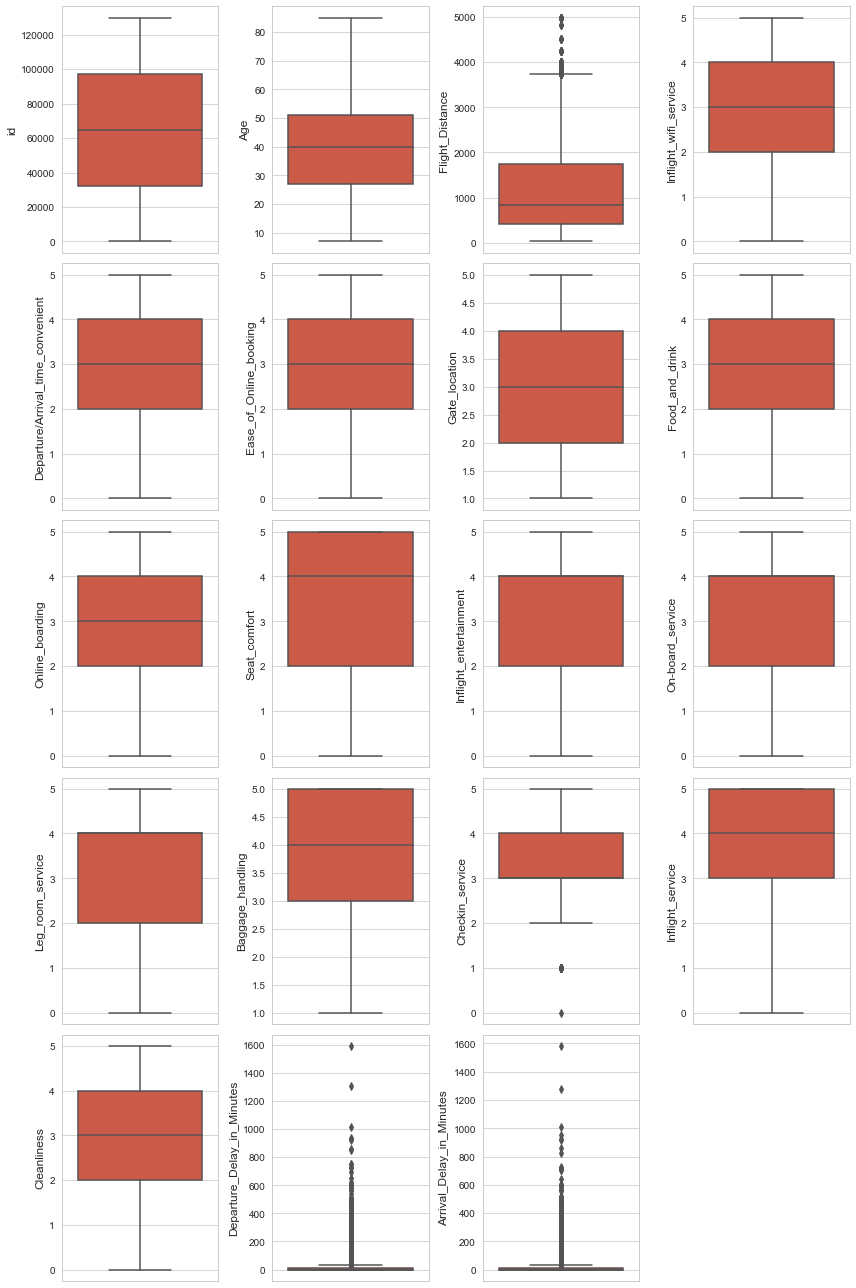

In [24]:

fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(5,4,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

In [25]:
df_train.describe()

,id,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000
mean,64861.793812,39.413640,1190.164082,2.728511,3.057108,2.755206,2.974628,3.206345,3.253335,3.443151,3.365482,3.388172,3.354884,3.632232,3.306810,3.642927,3.290281,14.807574,15.143342
std,37474.467712,15.092303,998.396339,1.327192,1.525147,1.398030,1.277405,1.329621,1.348535,1.317575,1.331953,1.286404,1.314733,1.180796,1.265402,1.174510,1.311887,38.450820,38.891336
min,2.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32424.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64715.000000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97332.500000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [26]:
df_train.corr()

,id,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
id,1.000000,0.023967,0.097215,-0.019456,-0.003361,0.014280,-0.000335,0.002173,0.057341,0.051768,0.003100,0.054544,0.044300,0.076561,0.079185,0.079824,0.025973,-0.018339,-0.035572
Age,0.023967,1.000000,0.099048,0.018496,0.038492,0.025711,0.001231,0.022824,0.209464,0.159845,0.076895,0.059456,0.041611,-0.046050,0.037247,-0.048431,0.051988,-0.009967,-0.011617
Flight_Distance,0.097215,0.099048,1.000000,0.004634,-0.019952,0.065333,0.003869,0.056299,0.217012,0.157529,0.128752,0.110821,0.135994,0.063171,0.074079,0.059516,0.093071,0.003973,-0.000186
Inflight_wifi_service,-0.019456,0.018496,0.004634,1.000000,0.344267,0.716543,0.336494,0.133401,0.456090,0.121088,0.207043,0.120896,0.160354,0.119385,0.043653,0.110487,0.131067,-0.017364,-0.018732
Departure/Arrival_time_convenient,-0.003361,0.038492,-0.019952,0.344267,1.000000,0.436776,0.445505,0.005390,0.068031,0.011455,-0.006082,0.067122,0.013310,0.072367,0.093633,0.072332,0.014299,0.004656,0.002771
Ease_of_Online_booking,0.014280,0.025711,0.065333,0.716543,0.436776,1.000000,0.457714,0.030501,0.402273,0.027779,0.045469,0.038555,0.107364,0.037959,0.011901,0.035669,0.014848,-0.002988,-0.004867
Gate_location,-0.000335,0.001231,0.003869,0.336494,0.445505,0.457714,1.000000,-0.001104,0.000505,0.002149,0.003520,-0.028130,-0.006523,0.002954,-0.033707,0.001138,-0.004141,0.006256,0.006319
Food_and_drink,0.002173,0.022824,0.056299,0.133401,0.005390,0.030501,-0.001104,1.000000,0.232874,0.573763,0.621413,0.058949,0.035512,0.034390,0.086838,0.033685,0.656560,-0.029091,-0.032129
Online_boarding,0.057341,0.209464,0.217012,0.456090,0.068031,0.402273,0.000505,0.232874,1.000000,0.419174,0.284012,0.156716,0.126095,0.083254,0.205962,0.076429,0.329270,-0.018451,-0.021520
Seat_comfort,0.051768,0.159845,0.157529,0.121088,0.011455,0.027779,0.002149,0.573763,0.419174,1.000000,0.609599,0.131058,0.107630,0.075681,0.193182,0.069735,0.678405,-0.027534,-0.029364


<AxesSubplot:>

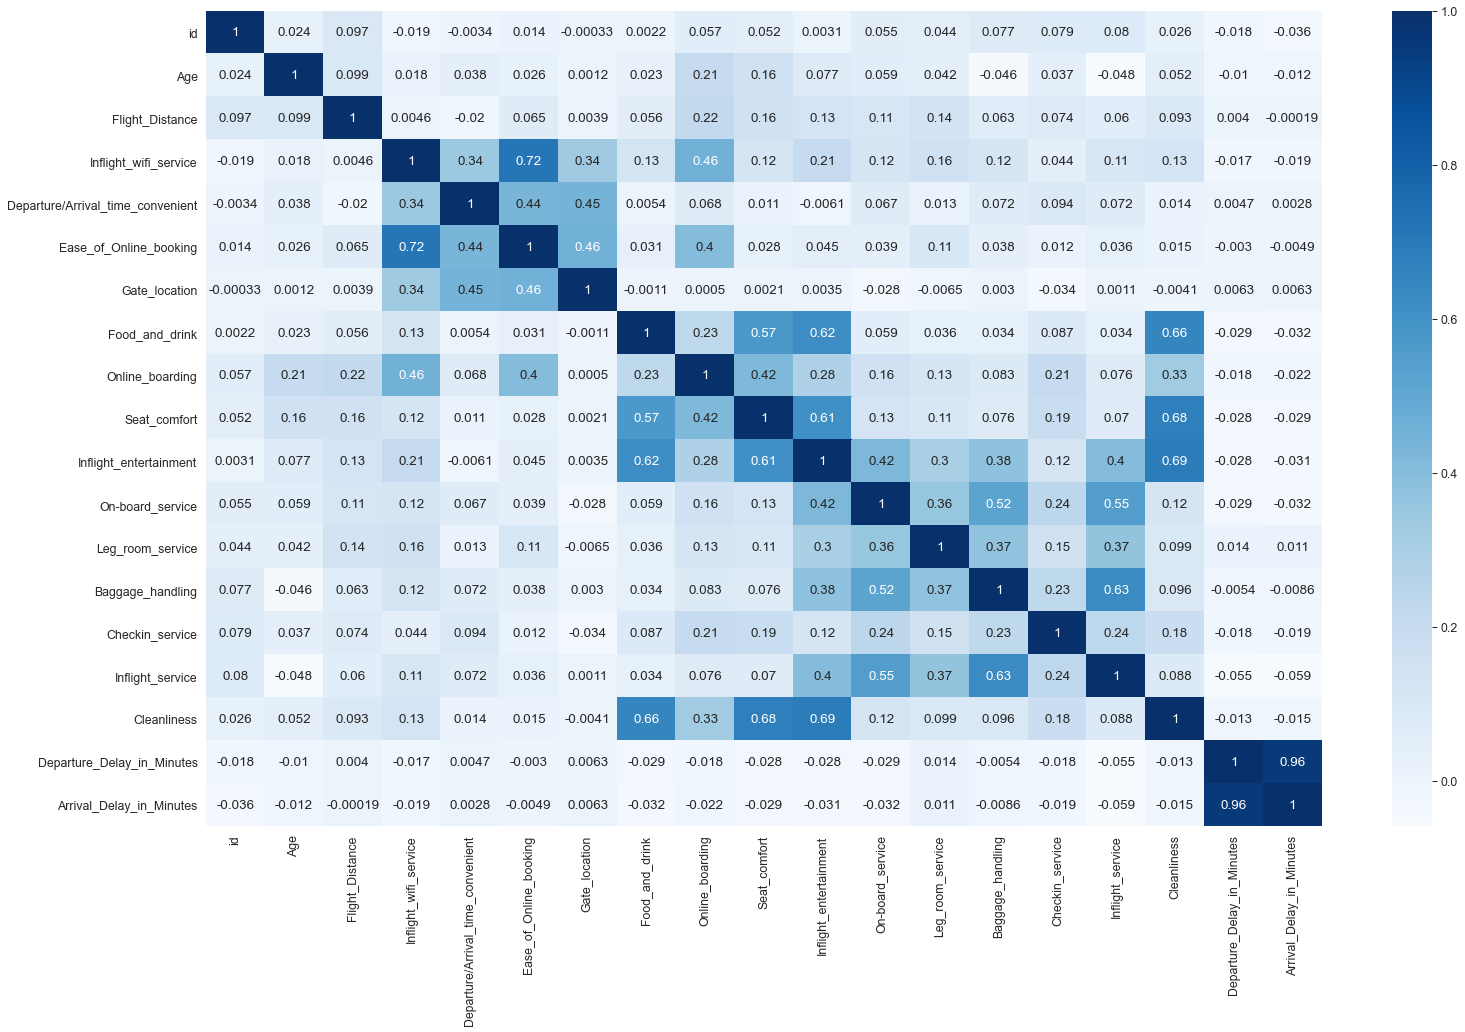

In [27]:
sns.set_style('whitegrid')
plt.figure(figsize=(25,15))
sns.set_context('paper', font_scale=1.4)

crash_mx = df_train.corr()
sns.heatmap(crash_mx, annot=True, cmap='Blues')

•	"Ease of Online booking" and "Inflight wifi service" are positive correlated with ratio 0.72

•	"Inflight entertainment" and "Food and drink" are positive correlated with ratio 0.62.

•	"Inflight entertainment" and "Seat comfort" are positive correlated with ratio 0.61.

•	"Inflight service" and "Baggage handling" are positive correlated with ratio 0.63.

•	"Cleanliness" and "Food and drink" are positive correlated with ratio 0.66.

•	"Cleanliness" and "Seat comfort" are positive correlated with ratio 0.68.

•	"Cleanliness" and "Inflight entertainment" are positive correlated with ratio 0.69.

•	Arrival Delay in Minutes & Departure Delay in Minutes 0.96


'Departure delay in minutes' and 'Arrival delay in minutes' columns are highly positive correlated (0.96) as we have seen. Normally we should drop one of them. Since 'Arrival_Delay_in_Minutes' column has null values, it would be our first choice. But 'Departure delay in minutes' and 'Arrival_Delay_in_Minutes' columns have full of zero values, so they are not very important features in model. I will drop both of these columns.

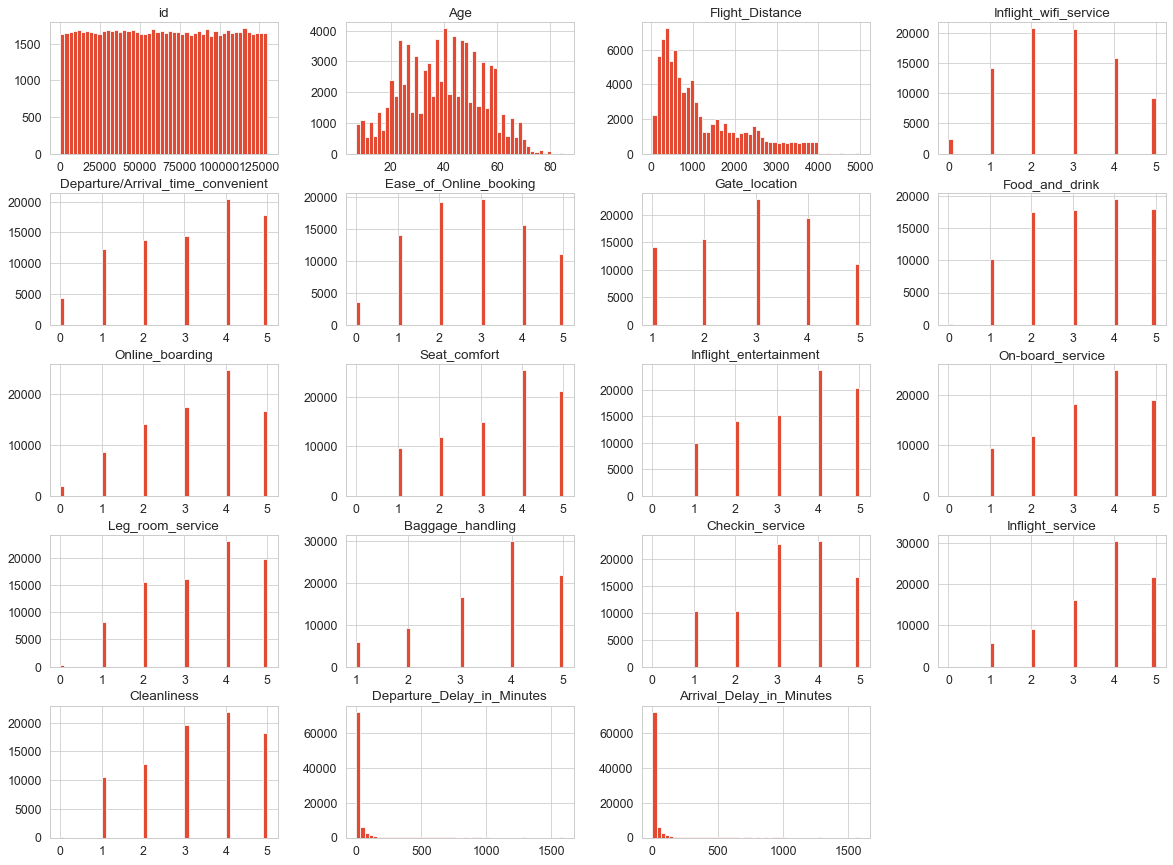

In [28]:
df_train.hist(bins=50, figsize=(20,15));

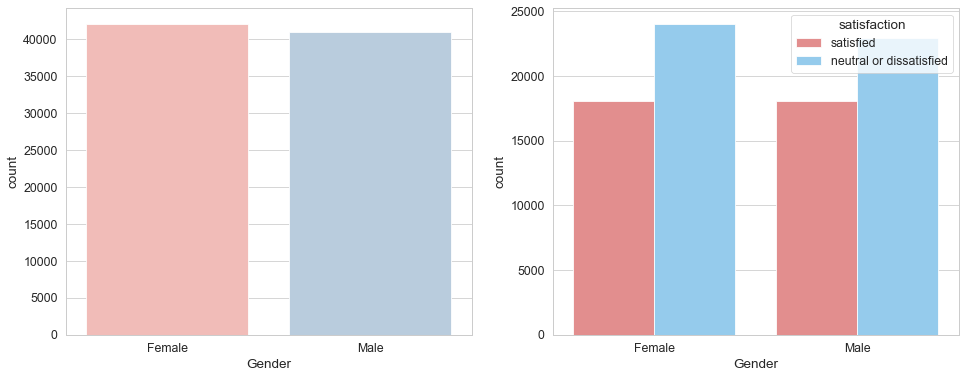

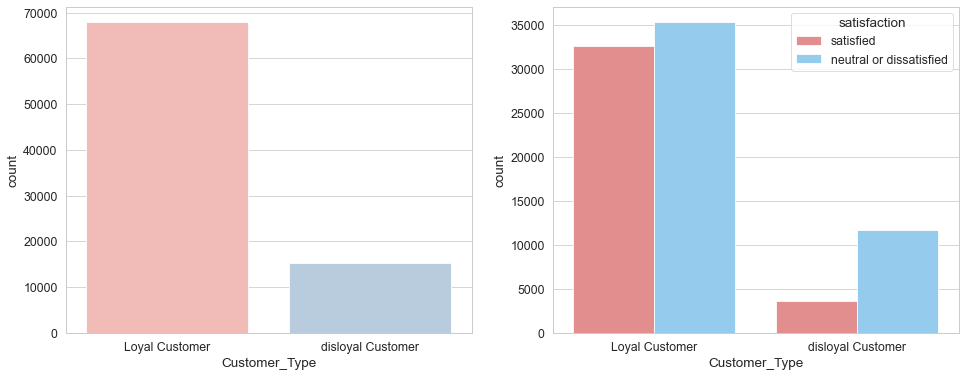

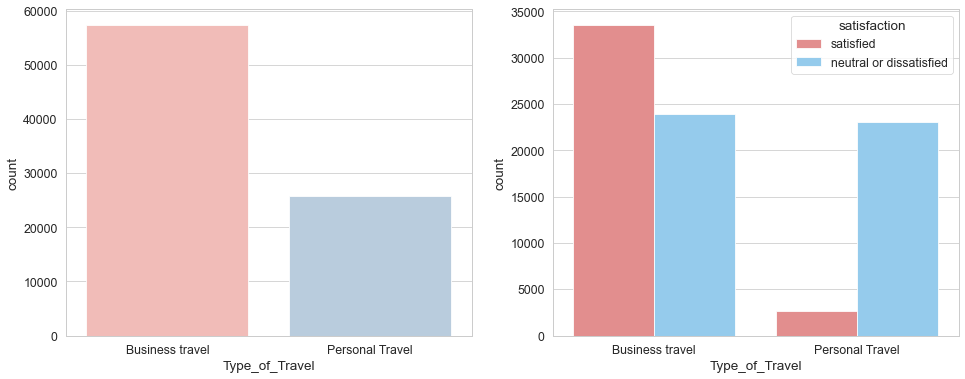

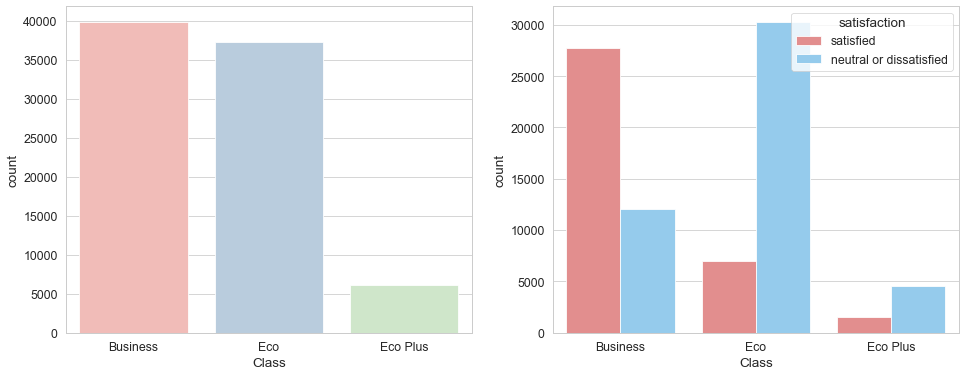

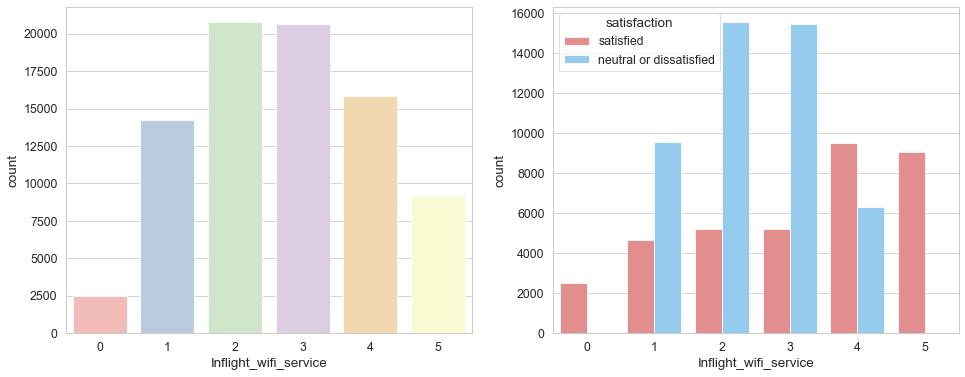

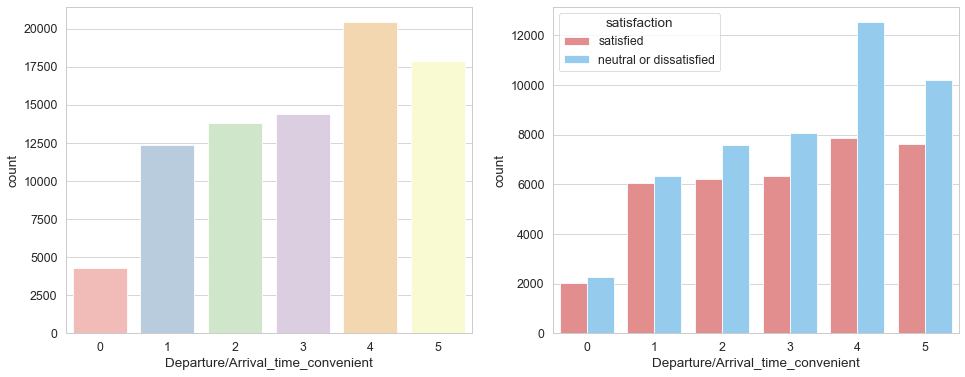

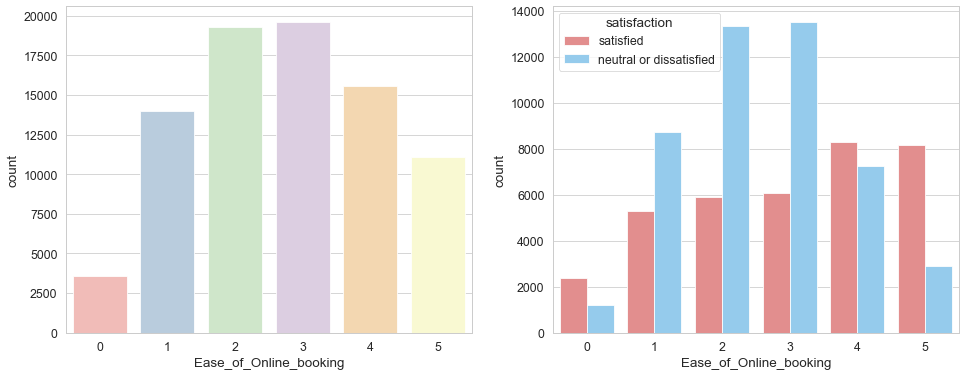

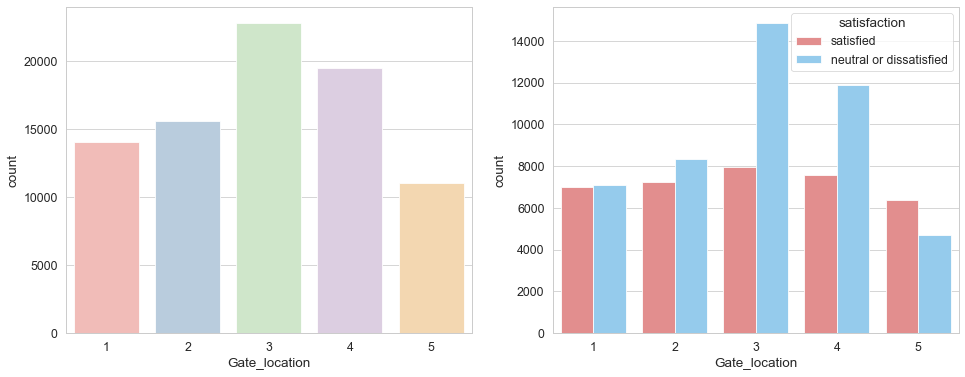

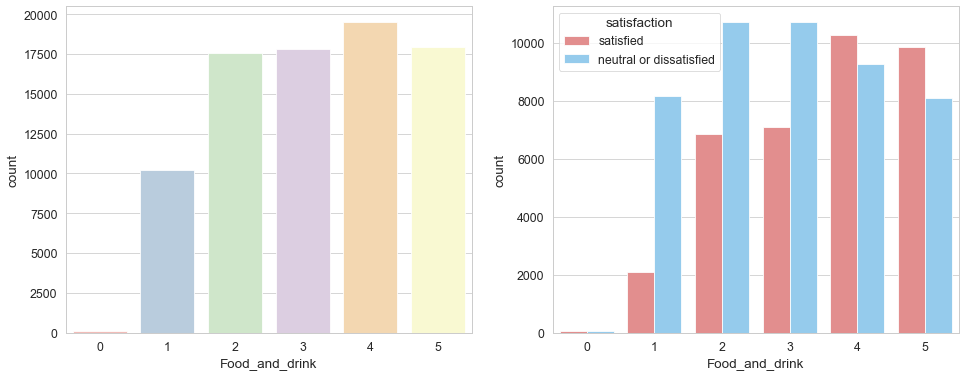

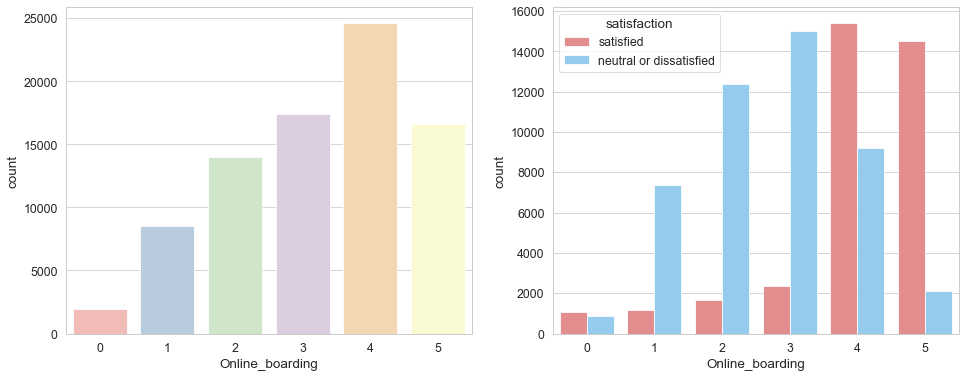

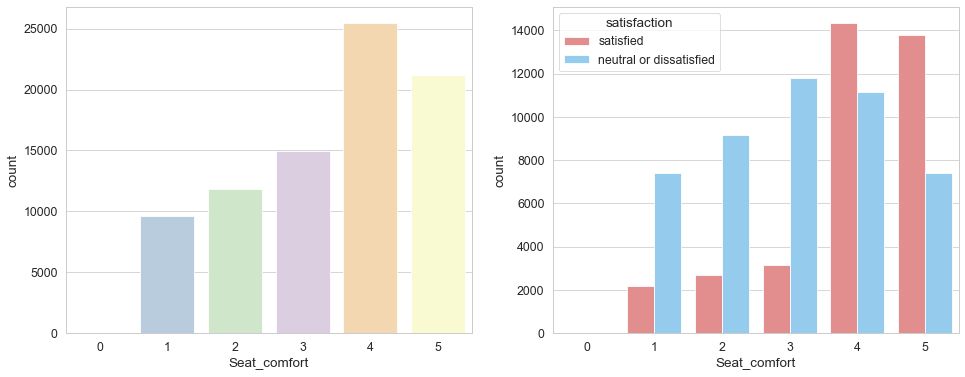

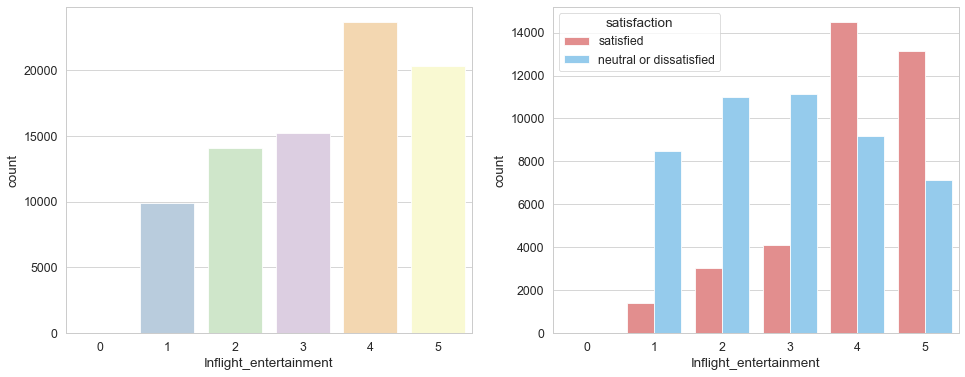

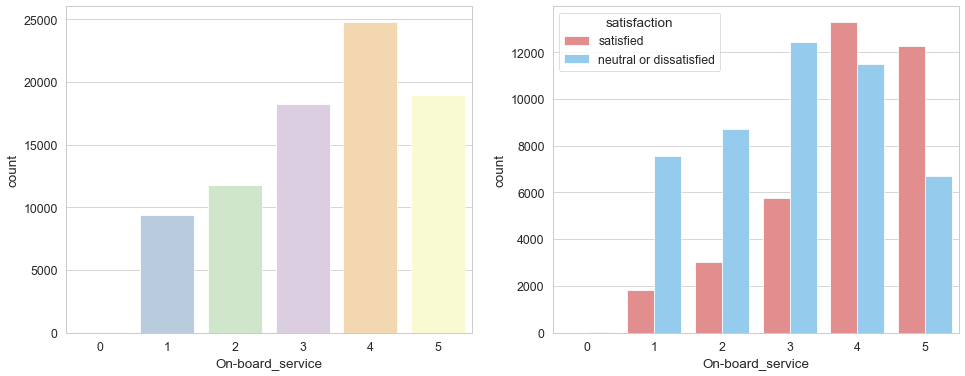

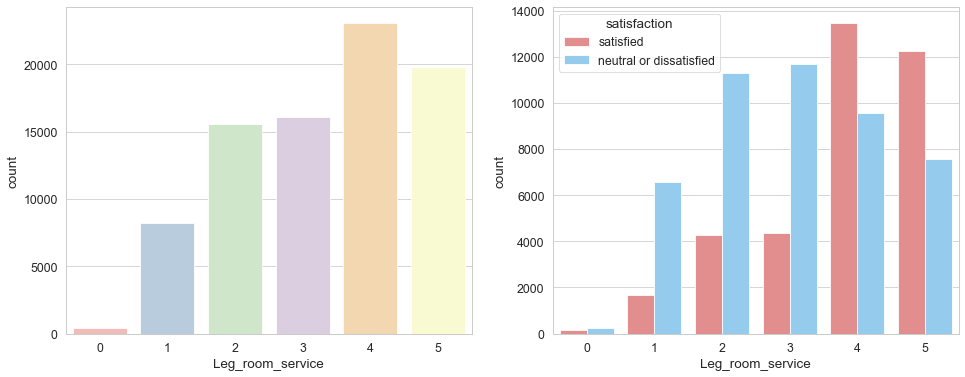

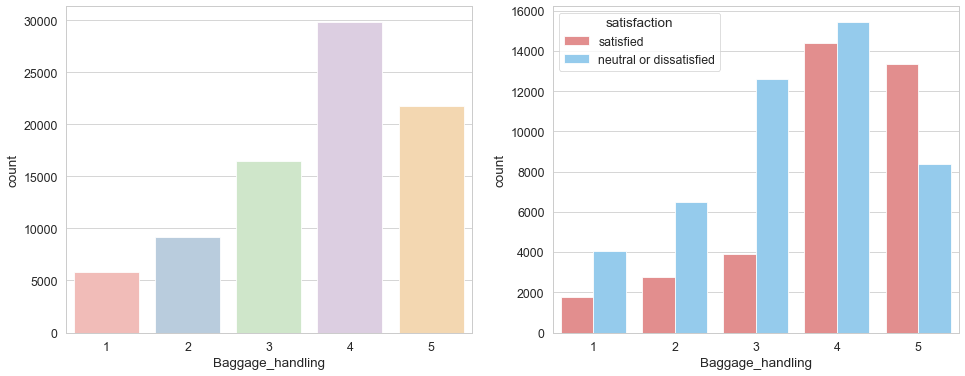

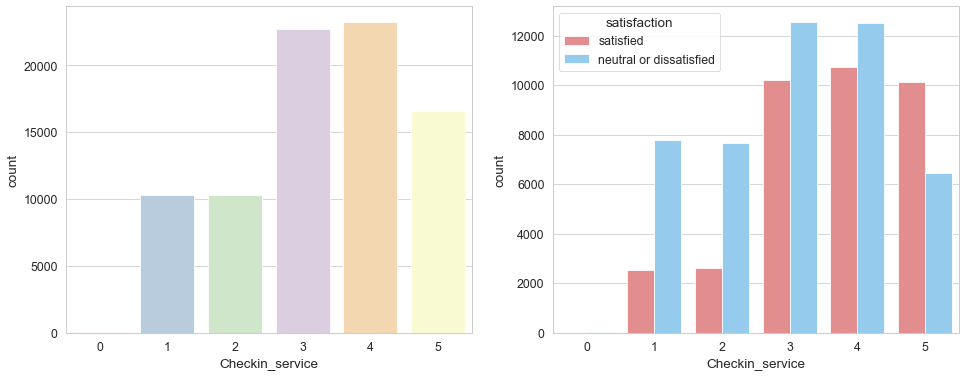

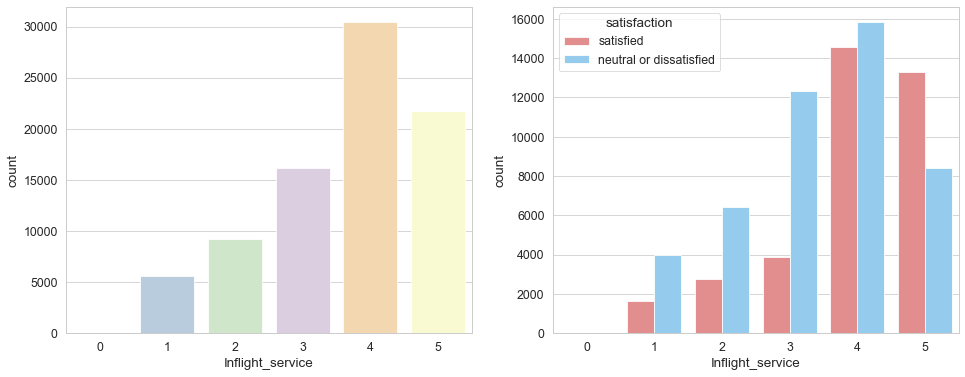

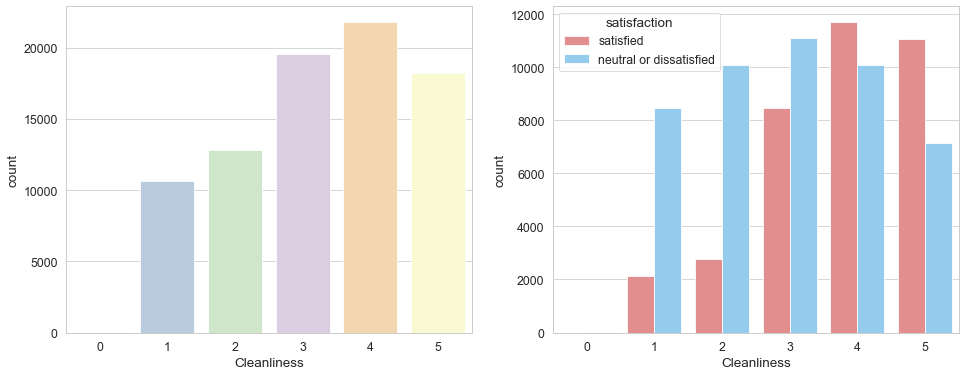

In [29]:
categorics=['Gender', 'Customer_Type','Type_of_Travel', 'Class','Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness']
       
for i in categorics:
  plt.figure(figsize=(16,6))
  plt.subplot(1,2,1)
  sns.countplot(x=df_train[i],palette="Pastel1")

  plt.subplot(1,2,2)
  sns.countplot(x=df_train[i],hue=df_train.satisfaction, palette=["#f08080","#87cefa"])
  plt.show()

In [30]:
df_train['satisfaction'].value_counts(normalize=True)

neutral or dissatisfied    0.564765
satisfied                  0.435235
Name: satisfaction, dtype: float64

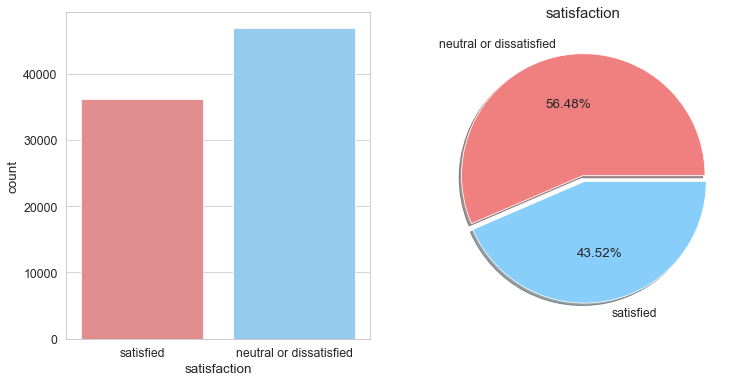

In [31]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='satisfaction', data=df_train, palette=["#f08080","#87cefa"])

plt.subplot(1, 2, 2)
plt.pie(df_train['satisfaction'].value_counts(), labels=["neutral or dissatisfied","satisfied"], explode=[0, 0.05], autopct='%1.2f%%', shadow=True,colors=["lightcoral","lightskyblue"])
plt.title('satisfaction', fontsize=15)

plt.show()

Text(0.5, 1.0, 'Histogram of Flight Distance')

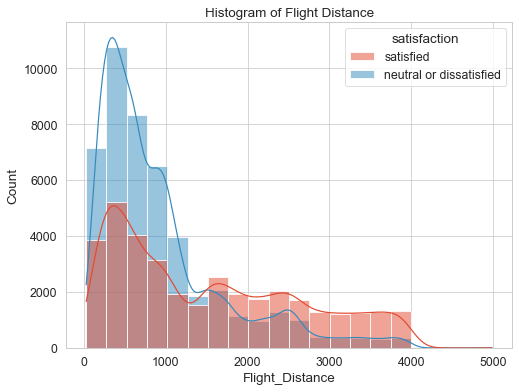

In [32]:
plt.figure(figsize=(8,6))
sns.histplot(x='Flight_Distance', data = df_train, bins = 20, hue ='satisfaction', 
             kde = True).set_title('Histogram of Flight Distance')

Text(0.5, 1.0, 'Histogram of Flight Distance by Eco and Eco Plus Class')

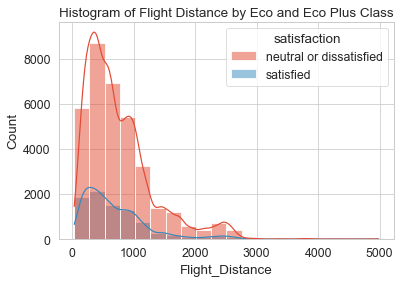

In [33]:
sns.histplot(x='Flight_Distance', data =  df_train[ df_train['Class'] != 'Business'],
bins = 20, hue ='satisfaction',
kde = True).set_title('Histogram of Flight Distance by Eco and Eco Plus Class')

Text(0.5, 1.0, 'Histogram of Flight Distance by Business Class')

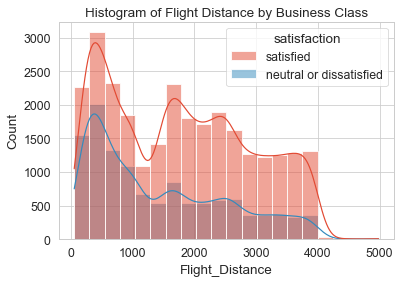

In [34]:
sns.histplot(x='Flight_Distance', data =  df_train[ df_train['Class'] == 'Business'],bins = 20, hue ='satisfaction', 
             kde = True).set_title('Histogram of Flight Distance by Business Class')

Text(0.5, 1.0, 'Histogram of Departure Delay')

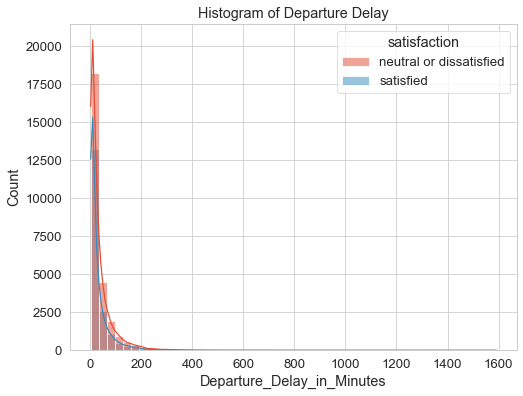

In [35]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.5)

sns.histplot(x='Departure_Delay_in_Minutes', data = df[df['Departure_Delay_in_Minutes'] >0], 
             bins = 50, hue ='satisfaction', kde = True).set_title('Histogram of Departure Delay')

Text(0.5, 1.0, 'Histogram of Departure Delay')

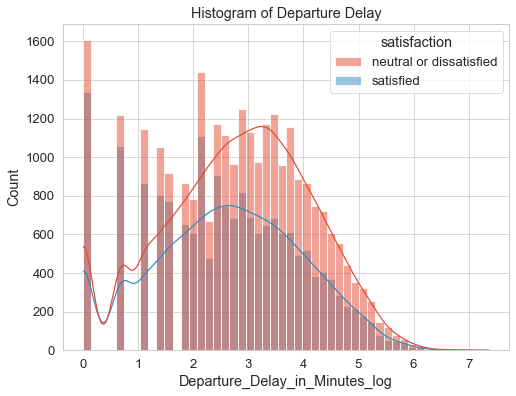

In [36]:
df['Departure_Delay_in_Minutes_log'] = np.log(df['Departure_Delay_in_Minutes'])
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.5)

sns.histplot(x='Departure_Delay_in_Minutes_log', data = df[df['Departure_Delay_in_Minutes'] >0], 
             bins = 50, hue ='satisfaction', kde = True).set_title('Histogram of Departure Delay')

In [37]:
df = df.drop('Departure_Delay_in_Minutes_log', axis = 1)

In [38]:
#plt.figure(figsize=(8,6))
#sns.histplot(x='Arrival_Delay_in_Minutes', data = df_train, bins = 20, hue ='satisfaction', 
             #kde = True).set_title('Histogram of Flight Distance')

<AxesSubplot:title={'center':'Customer Satisfaction \nby Flight with delayed departure \nand on-time arrival'}, xlabel='satisfaction', ylabel='count'>

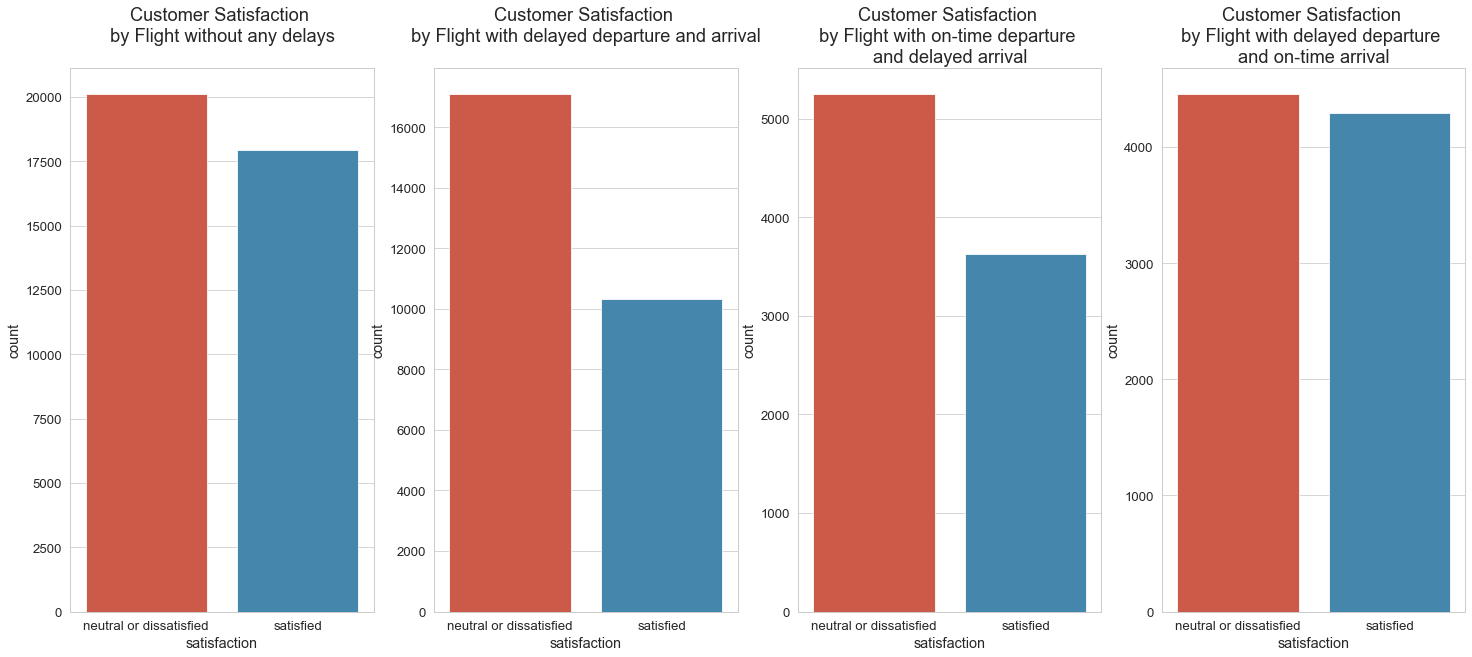

In [39]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1,4, figsize=(25,10))
sns.set_context('paper', font_scale=1.9)


ax[0].set_title('Customer Satisfaction \nby Flight without any delays\n')
sns.countplot(x='satisfaction', order = ['neutral or dissatisfied', 'satisfied'], 
              data =  df_train[( df_train['Departure_Delay_in_Minutes']==0) & ( df_train['Arrival_Delay_in_Minutes']==0 )], 
              ax=ax[0])

ax[1].set_title('Customer Satisfaction \nby Flight with delayed departure and arrival\n')
sns.countplot(x='satisfaction', order = ['neutral or dissatisfied', 'satisfied'], 
              data =  df_train[( df_train['Departure_Delay_in_Minutes'] > 0) & ( df_train['Arrival_Delay_in_Minutes'] > 0)], 
              ax=ax[1])

ax[2].set_title('Customer Satisfaction \nby Flight with on-time departure \nand delayed arrival')
sns.countplot(x='satisfaction', order = ['neutral or dissatisfied', 'satisfied'], 
              data =  df_train[( df_train['Departure_Delay_in_Minutes'] == 0) & ( df_train['Arrival_Delay_in_Minutes'] > 0)], 
              ax=ax[2])

ax[3].set_title('Customer Satisfaction \nby Flight with delayed departure \nand on-time arrival')
sns.countplot(x='satisfaction', order = ['neutral or dissatisfied', 'satisfied'], 
              data =  df_train[( df_train['Departure_Delay_in_Minutes'] > 0) & ( df_train['Arrival_Delay_in_Minutes'] == 0)], 
              ax=ax[3])

<AxesSubplot:title={'center':'Customer Satisfaction by Type of Travel'}, xlabel='satisfaction', ylabel='count'>

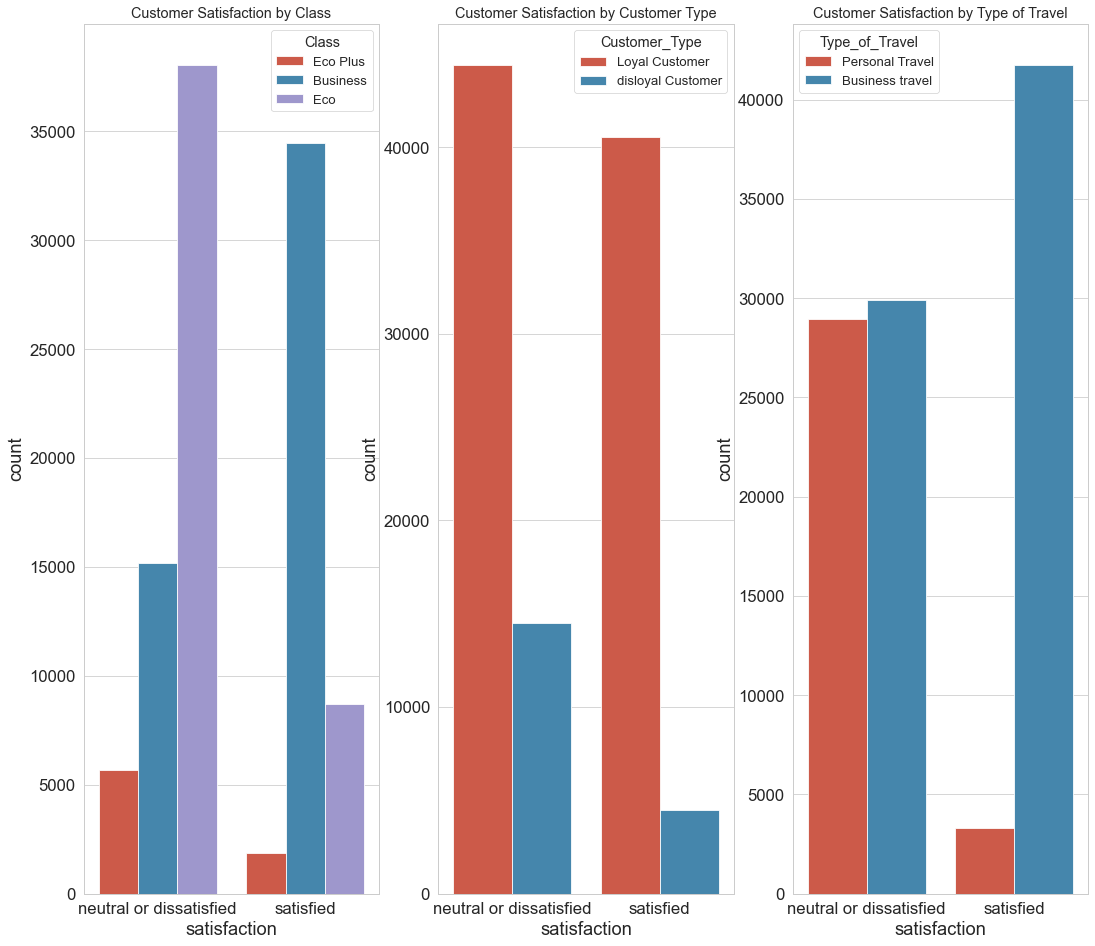

In [40]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1,3, figsize=(18,16))
sns.set_context('paper', font_scale=1.5)

ax[0].set_title('Customer Satisfaction by Class')
sns.countplot(x='satisfaction', data = df, hue = 'Class', ax=ax[0])

ax[1].set_title('Customer Satisfaction by Customer Type')
sns.countplot(x='satisfaction', data = df, hue = 'Customer_Type', ax=ax[1])

ax[2].set_title('Customer Satisfaction by Type of Travel')
sns.countplot(x='satisfaction', data = df, hue = 'Type_of_Travel', ax=ax[2])

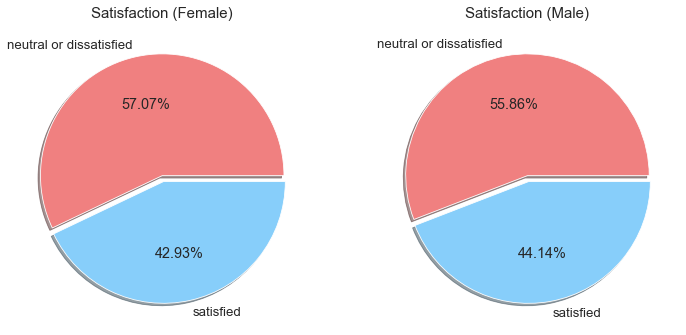

In [41]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(df_train.loc[df.Gender=="Female",'satisfaction'].value_counts(), labels=["neutral or dissatisfied","satisfied"], explode=[0, 0.05], autopct='%1.2f%%', shadow=True,colors=["lightcoral","lightskyblue"])
plt.title('Satisfaction (Female)', fontsize=15)

plt.subplot(1, 2, 2)
plt.pie(df_train.loc[df.Gender=="Male",'satisfaction'].value_counts(), labels=["neutral or dissatisfied","satisfied"], explode=[0, 0.05], autopct='%1.2f%%', shadow=True,colors=["lightcoral","lightskyblue"])
plt.title('Satisfaction (Male)', fontsize=15)

plt.show()

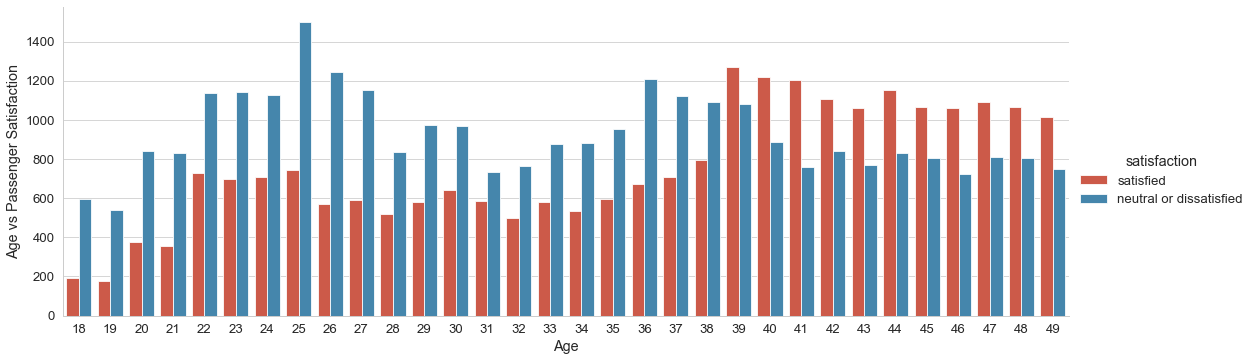

In [42]:

age = sns.catplot("Age", data=df_train, kind='count',aspect=3.0, hue='satisfaction', order=range(18,50))
age.set_ylabels('Age vs Passenger Satisfaction')

# Model


In [43]:
df_train.shape, df_test.shape 

((83123, 24), (20781, 24))

In [44]:
df_train = pd.get_dummies(df_train, drop_first =True, columns = ['Gender', 'Customer_Type', 
                                                         'Type_of_Travel', 'Class'])

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83123 entries, 99599 to 38693
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 83123 non-null  int64  
 1   Age                                83123 non-null  int64  
 2   Flight_Distance                    83123 non-null  int64  
 3   Inflight_wifi_service              83123 non-null  int64  
 4   Departure/Arrival_time_convenient  83123 non-null  int64  
 5   Ease_of_Online_booking             83123 non-null  int64  
 6   Gate_location                      83123 non-null  int64  
 7   Food_and_drink                     83123 non-null  int64  
 8   Online_boarding                    83123 non-null  int64  
 9   Seat_comfort                       83123 non-null  int64  
 10  Inflight_entertainment             83123 non-null  int64  
 11  On-board_service                   83123 non-null 

In [46]:
#df_train['satisfaction'] = df_train['satisfaction'].apply(lambda x: np.where(x=='satisfied', 1, 0))
df_train['satisfaction'] =df_train.satisfaction.map({"satisfied":0, "neutral or dissatisfied":1})

In [47]:
x_train = df_train.drop('satisfaction', axis = 1)
y_train = df_train['satisfaction']

In [48]:
#models_dict = {'Model':[],
              #'Accuracy':[],
              #'Recall':[],
              #'Precision':[],
              #'F1 score':[],}

## K Neighbors Classifier

In [49]:
##GridSearchCV

In [50]:
from sklearn.model_selection import GridSearchCV
knn_gs=KNeighborsClassifier()
k_range = list(range(7, 10))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range ,weights=weight_options)
grid = GridSearchCV(knn_gs, param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train);
print("Best estimator: ", grid.best_estimator_)

Best estimator:  KNeighborsClassifier(n_neighbors=9, weights='distance')


In [51]:
#KNeighborsClassifier

In [52]:
ml_knn_v = KNeighborsClassifier(n_neighbors=9 ,weights='distance' )
scores = cross_val_score(ml_knn_v, x_train, y_train, cv=5, scoring='accuracy')
print('scores',np.mean(scores), scores)
recall = cross_val_score(ml_knn_v, x_train, y_train, cv=5, scoring='recall')
print('Recall', np.mean(recall), recall)
precision = cross_val_score(ml_knn_v, x_train, y_train, cv=5, scoring='precision')
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(ml_knn_v,x_train, y_train, cv=5, scoring='f1')
print('F1', np.mean(f1), f1)


scores 0.6760221837075846 [0.67657143 0.67777444 0.68174436 0.66813041 0.67589028]
Recall 0.7480242837362872 [0.74928107 0.75609756 0.75087869 0.73522207 0.74864203]
Precision 0.6992825540544686 [0.69944323 0.69830809 0.70485903 0.69488625 0.69891618]
F1 0.7228222874260037 [0.72350491 0.72605472 0.72714146 0.71448533 0.72292502]


In [53]:
#models_dict['Model'].append("KNN ")
#models_dict['Accuracy'].append((np.mean(scores)))
#models_dict['Recall'].append(recall_score(np.mean(recall), recall,average="binary"))
#models_dict['Precision'].append(precision_score(np.mean(precision)))
#models_dict['F1 score'].append(( np.mean(f1), f1))

#result = pd.DataFrame.from_dict(models_dict)
#result


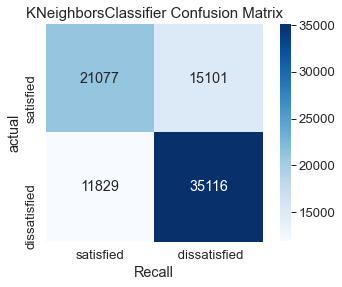

In [112]:
y_pred = cross_val_predict(ml_knn_v, X = x_train, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat ,cmap=plt.cm.Blues, annot = True , square = True , fmt = 'd', xticklabels =["satisfied", " dissatisfied"],yticklabels=["satisfied", "dissatisfied"])
plt.title('KNeighborsClassifier Confusion Matrix',fontsize = 15)
plt.xlabel('Recall')
plt.ylabel('actual');

## Logistic Regression Classifier

In [113]:
params_log = {'C': [0.001,0.01,0.1,1,10,100,1000] }
decision_log_grid = GridSearchCV(LogisticRegression(), param_grid = params_log, scoring='accuracy', cv = 5)
decision_log_grid.fit(x_train, y_train)
decision_log_grid.best_params_

{'C': 0.1}

In [114]:
lm_Log_v = LogisticRegression(C=0.1)
scores = cross_val_score(lm_Log_v , x_train, y_train, cv=5, scoring='accuracy')
print('scores',np.mean(scores), scores)
recall = cross_val_score(lm_Log_v, x_train, y_train, cv=5, scoring='recall')
print('Recall', np.mean(recall), recall)
precision = cross_val_score(lm_Log_v, x_train, y_train, cv=5, scoring='precision')
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(lm_Log_v,x_train, y_train, cv=5, scoring='f1')
print('F1', np.mean(f1), f1)

scores 0.6804858828978124 [0.66646617 0.63416541 0.71278195 0.67522859 0.7137873 ]
Recall 0.6987325593779954 [0.66727021 0.77814464 0.69549473 0.65257216 0.70018106]
Precision 0.7307923861861515 [0.72127562 0.64626272 0.77314705 0.74140852 0.77186803]
F1 0.7120055454300257 [0.69322268 0.70609839 0.73226801 0.69415963 0.73427901]


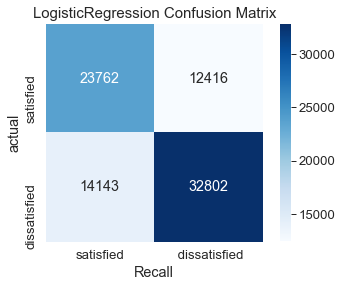

In [115]:
y_pred = cross_val_predict(lm_Log_v, X = x_train, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat ,cmap=plt.cm.Blues, annot = True , square = True , fmt = 'd', xticklabels =["satisfied", " dissatisfied"],yticklabels=["satisfied", "dissatisfied"])
plt.title('LogisticRegression Confusion Matrix',fontsize = 15)
plt.xlabel('Recall')
plt.ylabel('actual');


## Decision Tree Classifier

In [116]:
params_dt = { "max_depth": [2, 4, 6, 8, 10],"min_samples_leaf": [2, 3, 4, 5]}
decision_tree_grid = GridSearchCV(DecisionTreeClassifier(), param_grid = params_dt, scoring='accuracy', cv = 5)
decision_tree_grid.fit(x_train, y_train)
decision_tree_grid.best_params_

{'max_depth': 10, 'min_samples_leaf': 3}

In [117]:
lm_dt_v= DecisionTreeClassifier(max_depth=10,min_samples_leaf=2)
scores = cross_val_score(lm_dt_v, x_train, y_train, cv=5, scoring='accuracy',)
print('scores',np.mean(scores), scores)
recall = cross_val_score(lm_dt_v, x_train, y_train, cv=5, scoring='recall')
print('Recall', np.mean(recall), recall)
precision = cross_val_score(lm_dt_v, x_train, y_train, cv=5, scoring='precision')
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(lm_dt_v,x_train, y_train, cv=5, scoring='f1')
print('F1', np.mean(f1), f1)

scores 0.9423024097780545 [0.94105263 0.93996992 0.94267669 0.9449591  0.94285371]
Recall 0.9584620300351474 [0.95963361 0.9636809  0.96016615 0.95611886 0.95271062]
Precision 0.9405071544822464 [0.93720108 0.93209686 0.93956445 0.94713517 0.94653822]
F1 0.9494470528775354 [0.94854798 0.94777644 0.94959178 0.95181553 0.94950353]


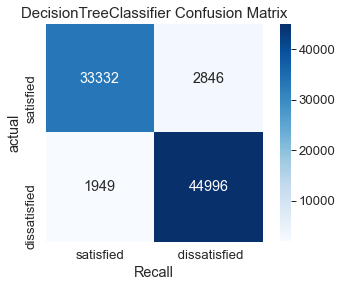

In [118]:
y_pred = cross_val_predict(lm_dt_v, X = x_train, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat ,cmap=plt.cm.Blues, annot = True , square = True , fmt = 'd', xticklabels =["satisfied", " dissatisfied"],yticklabels=["satisfied", "dissatisfied"])
plt.title('DecisionTreeClassifier Confusion Matrix',fontsize = 15)
plt.xlabel('Recall')
plt.ylabel('actual');


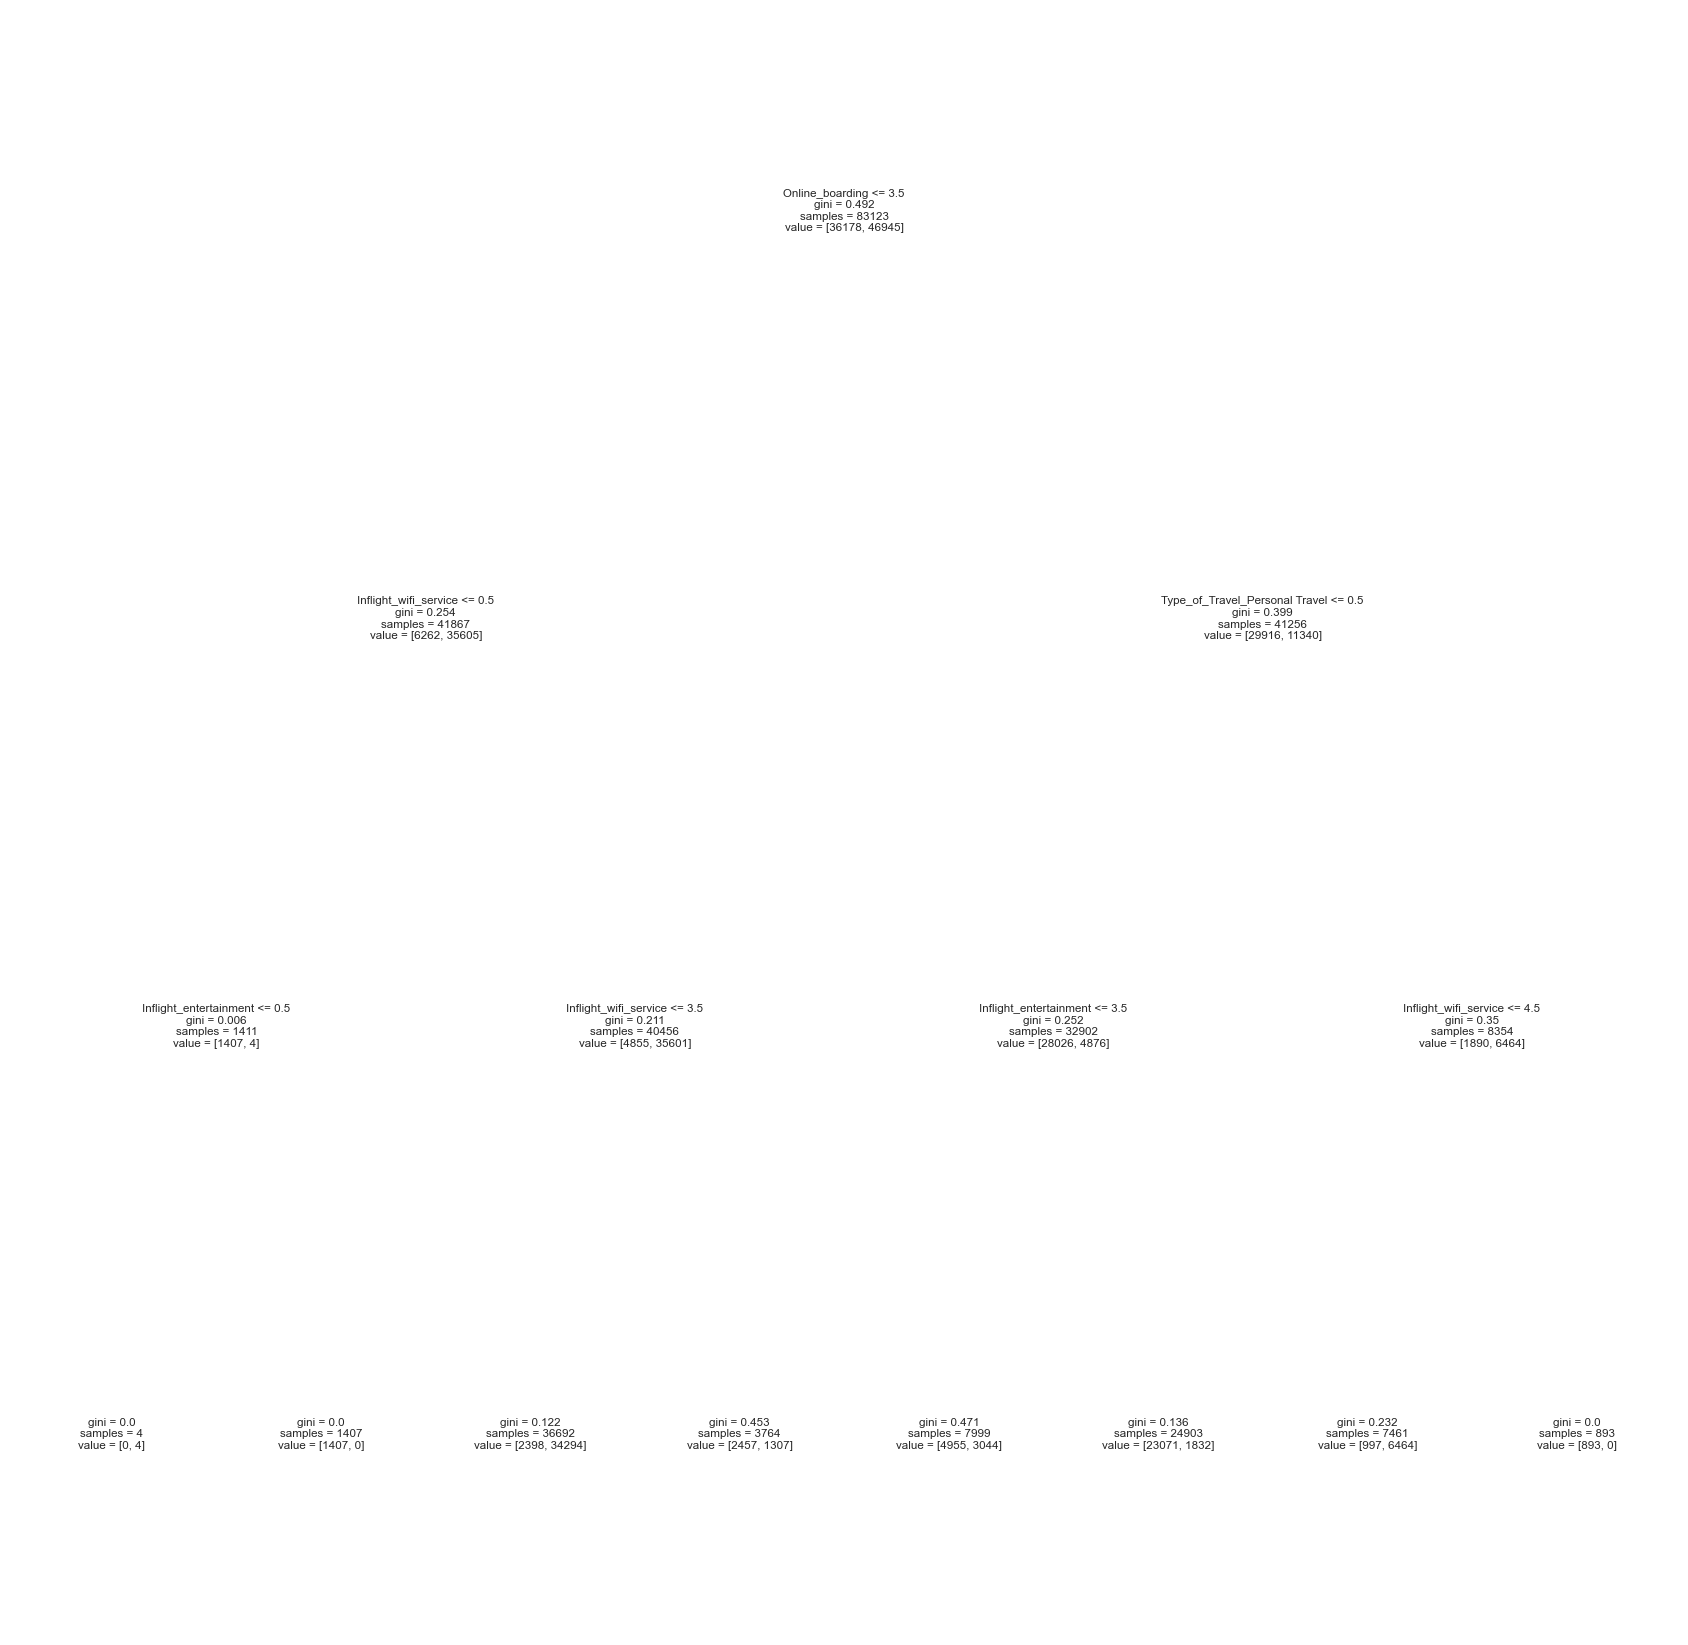

In [61]:
from sklearn.tree import plot_tree
from sklearn import tree

lm_dtt_tt=DecisionTreeClassifier(max_depth=3,min_samples_leaf=2 ,random_state=seed)
lm_dtt_tt.fit(x_train,y_train)
plt.figure(figsize=(30, 30))
tree_dot=plot_tree(lm_dtt_tt,feature_names=x_train.columns)
#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(lm_dtt_tt,feature_names=x_train.columns ,
                   #filled=True)

## Voting Classifier

In [62]:
log_clf = LogisticRegression(C=0.1)
ml_dt =  DecisionTreeClassifier(max_depth=10,min_samples_leaf=2)
ext_clf = ExtraTreesClassifier(n_estimators=50, random_state=seed)
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt', ml_dt),('re', ext_clf)],voting='hard')
voting_clf_v=  VotingClassifier(estimators=[('lr', log_clf), ('dt', ml_dt),('re', ext_clf)])
scores = cross_val_score(voting_clf_v, x_train, y_train, cv=5, scoring='accuracy')
print('scores',np.mean(scores), scores)
recall = cross_val_score(voting_clf_v, x_train, y_train, cv=5, scoring='recall')
print('Recall', np.mean(recall), recall)
precision = cross_val_score(voting_clf_v, x_train, y_train, cv=5, scoring='precision')
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(voting_clf_v,x_train, y_train, cv=5, scoring='f1')
print('F1', np.mean(f1), f1)

scores 0.9512770376374045 [0.95103759 0.94899248 0.9526015  0.95199711 0.9517565 ]
Recall 0.9679412077963574 [0.96794121 0.97614229 0.96804772 0.96400043 0.9635744 ]
Precision 0.9470025219531102 [0.94646949 0.93625498 0.94914369 0.95171979 0.95142467]
F1 0.957319785747736 [0.95718574 0.95578267 0.95844758 0.95767196 0.95751098]


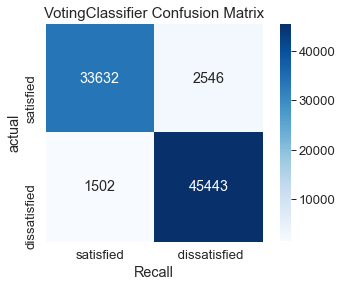

In [119]:
y_pred = cross_val_predict(voting_clf_v, X = x_train, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat ,cmap=plt.cm.Blues, annot = True , square = True , fmt = 'd', xticklabels =["satisfied", " dissatisfied"],yticklabels=["satisfied", "dissatisfied"])
plt.title('VotingClassifier Confusion Matrix',fontsize = 15)
plt.xlabel('Recall')
plt.ylabel('actual');

## Bagging Classifier

In [120]:
bag_clf_v=BaggingClassifier( KNeighborsClassifier(n_neighbors=9 ,weights='distance' ), n_estimators=100,
bootstrap=True, n_jobs=-1, oob_score=True)
scores = cross_val_score(bag_clf_v, x_train, y_train, cv=5, scoring='accuracy')
print('scores',np.mean(scores), scores)
recall = cross_val_score(bag_clf_v, x_train, y_train, cv=5, scoring='recall')
print('Recall', np.mean(recall), recall)
precision = cross_val_score(bag_clf_v, x_train, y_train, cv=5, scoring='precision')
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(bag_clf_v,x_train, y_train, cv=5, scoring='f1')
print('F1', np.mean(f1), f1)

scores 0.6791501183179316 [0.67849624 0.68018045 0.68348872 0.67342397 0.68016121]
Recall 0.7555011183299606 [0.75673661 0.76312706 0.75652359 0.74747044 0.75364789]
Precision 0.6993728266639724 [0.69920299 0.69645803 0.70342092 0.69742618 0.70035601]
F1 0.7265203407660494 [0.72666905 0.7291147  0.72841218 0.72172886 0.72667691]


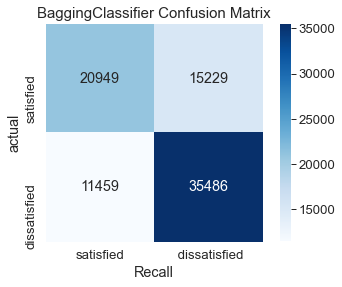

In [121]:
y_pred = cross_val_predict(bag_clf_v, X = x_train, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat ,cmap=plt.cm.Blues, annot = True , square = True , fmt = 'd', xticklabels =["satisfied", " dissatisfied"],yticklabels=["satisfied", "dissatisfied"])
plt.title('BaggingClassifier Confusion Matrix',fontsize = 15)
plt.xlabel('Recall')
plt.ylabel('actual');

## Random Forests Classifier

In [70]:
rfc_v = RandomForestClassifier(max_depth = 10,min_samples_leaf=2,n_estimators = 25, random_state = seed)
scores = cross_val_score(rfc_v, x_train, y_train, cv=5, scoring='accuracy')
print('scores',np.mean(scores), scores)
recall = cross_val_score(rfc_v, x_train, y_train, cv=5, scoring='recall')
print('Recall', np.mean(recall), recall)
precision = cross_val_score(rfc_v, x_train, y_train, cv=5, scoring='precision')
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(rfc_v,x_train, y_train, cv=5, scoring='f1')
print('F1', np.mean(f1), f1)

scores 0.9450212530845883 [0.94670677 0.94147368 0.94526316 0.94471848 0.94694418]
Recall 0.9616998615401002 [0.96442646 0.96123123 0.96282884 0.95718394 0.96282884]
Precision 0.9421642580924516 [0.9425419  0.93678638 0.94156859 0.94560185 0.94432257]
F1 0.9518267198512355 [0.9533586  0.94885139 0.95208004 0.95135765 0.95348592]


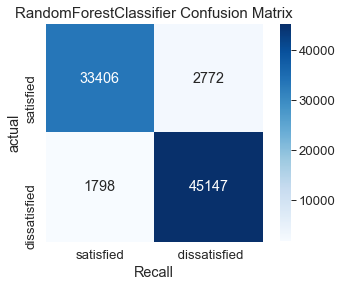

In [122]:
y_pred = cross_val_predict(rfc_v, X = x_train, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat ,cmap=plt.cm.Blues, annot = True , square = True , fmt = 'd', xticklabels =["satisfied", " dissatisfied"],yticklabels=["satisfied", "dissatisfied"])
plt.title('RandomForestClassifier Confusion Matrix',fontsize = 15)
plt.xlabel('Recall')
plt.ylabel('actual');

## AdaBoost Classifier

In [72]:
ada_clf_v = AdaBoostClassifier( DecisionTreeClassifier(max_depth=10), n_estimators=200,learning_rate=0.5)
scores = cross_val_score(ada_clf_v, x_train, y_train, cv=5, scoring='accuracy')
print('scores',np.mean(scores), scores)
recall = cross_val_score(ada_clf_v, x_train, y_train, cv=5, scoring='recall')
print('Recall', np.mean(recall), recall)
precision = cross_val_score(ada_clf_v, x_train, y_train, cv=5, scoring='precision')
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(ada_clf_v,x_train, y_train, cv=5, scoring='f1')
print('F1', np.mean(f1), f1)

scores 0.9545252353694631 [0.95518797 0.95278195 0.95446617 0.9541025  0.95608758]
Recall 0.9744168708062626 [0.97603579 0.9747577  0.97560976 0.97241453 0.97326659]
Precision 0.9468258938801715 [0.94777583 0.94300465 0.94587602 0.94703566 0.95043732]
F1 0.9605056449535503 [0.96207313 0.95893138 0.96020997 0.96047576 0.96083798]


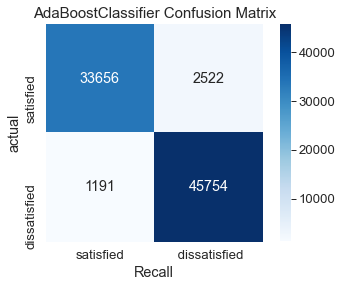

In [111]:
y_pred = cross_val_predict(ada_clf_v, X = x_train, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat ,cmap=plt.cm.Blues, annot = True , square = True , fmt = 'd', xticklabels =["satisfied", " dissatisfied"],yticklabels=["satisfied", "dissatisfied"])
plt.title('AdaBoostClassifier Confusion Matrix',fontsize = 15)
plt.xlabel('Recall')
plt.ylabel('actual');

## Stacking Classifier

In [74]:
dtc =  DecisionTreeClassifier(max_depth=10,min_samples_leaf=2)
rfc = RandomForestClassifier()
knn =  KNeighborsClassifier(n_neighbors=8)
clf = [('dtc',dtc),('rfc',rfc),('knn',knn)]
lr  =  LogisticRegression(C=0.1)

In [75]:
stack_V = StackingClassifier( estimators = clf,final_estimator = lr)
score = cross_val_score(stack_V,x_train, y_train,cv = 5,scoring = 'accuracy')
print('scores',np.mean(scores), scores)
recall = cross_val_score(stack_V, x_train, y_train, cv=5, scoring='recall')
print('Recall', np.mean(recall), recall)
precision = cross_val_score(stack_V, x_train, y_train, cv=5, scoring='precision')
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(stack_V,x_train, y_train, cv=5, scoring='f1')
print('F1', np.mean(f1), f1)

scores 0.9545252353694631 [0.95518797 0.95278195 0.95446617 0.9541025  0.95608758]
Recall 0.9742038555756738 [0.97507722 0.9748642  0.97518373 0.97220151 0.97369262]
Precision 0.9567546734795748 [0.95667154 0.95169835 0.95768747 0.95899318 0.95872282]
F1 0.9656205575479907 [0.96627319 0.96359428 0.9661545  0.96614473 0.9659361 ]


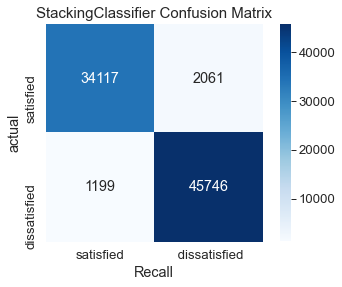

In [110]:
y_pred = cross_val_predict(stack_V, X = x_train, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat ,cmap=plt.cm.Blues, annot = True , square = True , fmt = 'd', xticklabels =["satisfied", " dissatisfied"],yticklabels=["satisfied", "dissatisfied"])
plt.title('StackingClassifier Confusion Matrix',fontsize = 15)
plt.xlabel('Recall')
plt.ylabel('actual');

## Support Vector Classification

In [ ]:
from sklearn.svm import SVC
svm_V =SVC(kernel='rbf',probability=True)
score = cross_val_score(svm_V,x_train, y_train,cv = 5,scoring = 'accuracy')
print('scores',np.mean(scores), scores)
recall = cross_val_score(svm_V, x_train, y_train, cv=5, scoring='recall')
print('Recall', np.mean(recall), recall)
precision = cross_val_score(svm_V, x_train, y_train, cv=5, scoring='precision')
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(svm_V,x_train, y_train, cv=5, scoring='f1')
print('F1', np.mean(f1), f1)

scores 0.6791501183179316 [0.67849624 0.68018045 0.68348872 0.67342397 0.68016121]
Recall 0.880115028224518 [0.87666418 0.87922036 0.88284162 0.8797529  0.88209607]


In [ ]:
y_pred = cross_val_predict(svm_V, X = x_train, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat ,cmap=plt.cm.Blues, annot = True , square = True , fmt = 'd',xticklabels =["satisfied", " dissatisfied"],yticklabels=["satisfied", "dissatisfied"]))
plt.title('SVC Confusion Matrix',fontsize = 15)
plt.xlabel('Recall')
plt.ylabel('actual');

In [ ]:
#from sklearn.metrics import classification_report
#print(classification_report(y_train, y_pred))
#plot_confusion_matrix(stack_V,x_train, y_train,cmap=plt.cm.Blues, normalize = 'all')

In [ ]:
#import xgboost as xgb
#from sklearn.metrics import mean_squared_error

#params_xgboost = {
    #"n_estimators": [5, 10, 5, 20, 25],
    #"max_depth": [2, 4, 6, 8, 10],
    #"learning_rate": [0.2, 0.4, 0.6, 0.8, 1]}

In [ ]:
#xgboost_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric = 'logloss', random_state = seed), 
                            #param_grid = params_xgboost, cv = 5, scoring = f1)

## TEST

In [123]:
df_test.shape 

(20781, 25)

In [78]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20781 entries, 53891 to 4615
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 20781 non-null  int64  
 1   Gender                             20781 non-null  object 
 2   Customer_Type                      20781 non-null  object 
 3   Age                                20781 non-null  int64  
 4   Type_of_Travel                     20781 non-null  object 
 5   Class                              20781 non-null  object 
 6   Flight_Distance                    20781 non-null  int64  
 7   Inflight_wifi_service              20781 non-null  int64  
 8   Departure/Arrival_time_convenient  20781 non-null  int64  
 9   Ease_of_Online_booking             20781 non-null  int64  
 10  Gate_location                      20781 non-null  int64  
 11  Food_and_drink                     20781 non-null  

In [79]:
df_test.isnull().sum()

id                                    0
Gender                                0
Customer_Type                         0
Age                                   0
Type_of_Travel                        0
Class                                 0
Flight_Distance                       0
Inflight_wifi_service                 0
Departure/Arrival_time_convenient     0
Ease_of_Online_booking                0
Gate_location                         0
Food_and_drink                        0
Online_boarding                       0
Seat_comfort                          0
Inflight_entertainment                0
On-board_service                      0
Leg_room_service                      0
Baggage_handling                      0
Checkin_service                       0
Inflight_service                      0
Cleanliness                           0
Departure_Delay_in_Minutes            0
Arrival_Delay_in_Minutes             65
satisfaction                          0
dtype: int64

In [80]:
df_test['Arrival_Delay_in_Minutes'].median()
df_test['Arrival_Delay_in_Minutes'] = df_test['Arrival_Delay_in_Minutes'].fillna(df_test['Arrival_Delay_in_Minutes'].median())

In [81]:
df_test['Arrival_Delay_in_Minutes'].describe()

count    20781.000000
mean        15.093595
std         37.668954
min          0.000000
25%          0.000000
50%          0.000000
75%         13.000000
max        970.000000
Name: Arrival_Delay_in_Minutes, dtype: float64

In [82]:
df_test.duplicated().sum() 

0

In [83]:
df_test = pd.get_dummies(df_test, drop_first =True, columns = ['Gender', 'Customer_Type', 
                                                         'Type_of_Travel', 'Class'])

In [84]:
df_test['satisfaction'] =df_test.satisfaction.map({"satisfied":0, "neutral or dissatisfied":1})

In [85]:
x_test = df_test.drop('satisfaction', axis = 1)
y_test = df_test['satisfaction']

In [101]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
rfc_v = RandomForestClassifier(max_depth = 10,min_samples_leaf=2,n_estimators = 25, random_state = seed)
#scores = cross_val_score(rfc_v, x_train, y_train, cv=5, scoring='accuracy')
result=cross_val_predict(rfc_v,x_test,y_test,cv=5)
print('scores',np.mean(scores), scores)
#scores=rfc_v.f1_score(result,y_test)
#print(scores)
#print(scores.mean())
#print(scores.mean())
cv_results = cross_validate(rfc_v,x_test,y_test,cv=5 , scoring='precision' )
print('Precision', np.mean(precision), precision)
cv_results = cross_validate(rfc_v,x_test,y_test,cv=5 , scoring='recall')
print('Recall', np.mean(recall), recall)
cv_results = cross_validate(rfc_v,x_test,y_test,cv=5 , scoring='f1')
print('F1', np.mean(f1), f1)
#precision_score(rfc_v,x_test,y_test, average='macro')
#result1=precision_score(rfc_v,x_test,y_test, average='macro')

scores 0.9545252353694631 [0.95518797 0.95278195 0.95446617 0.9541025  0.95608758]
Precision 0.9567546734795748 [0.95667154 0.95169835 0.95768747 0.95899318 0.95872282]
Recall 0.9742038555756738 [0.97507722 0.9748642  0.97518373 0.97220151 0.97369262]
F1 0.9656205575479907 [0.96627319 0.96359428 0.9661545  0.96614473 0.9659361 ]


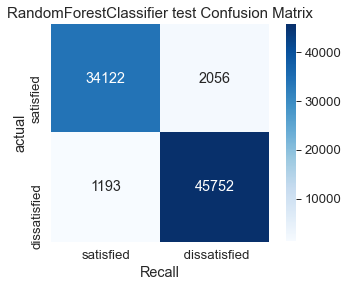

In [109]:
result=cross_val_predict(rfc_v,x_test,y_test,cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat ,cmap=plt.cm.Blues, annot = True , square = True , fmt = 'd', xticklabels =["satisfied", " dissatisfied"],yticklabels=["satisfied", "dissatisfied"])
plt.title('RandomForestClassifier test Confusion Matrix',fontsize = 15)
plt.xlabel('Recall')
plt.ylabel('actual');

In [107]:
#conda install -c plotly plotly

In [ ]:
#conda install -c anaconda py-xgboost

In [ ]:
#pip insall XGBoost

In [ ]:
#conda install -c anaconda py-xgboost